# Подключение библиотек

In [1]:
# подключение библиотеки pandas
import pandas as pd
import numpy as np
# подключение библиотеки matplotlib.pyplot
import matplotlib.pyplot as plt
# подключение библиотеки seaborn
import seaborn as sns
# подключение модулей из библиотеки sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Читанием исходный DataFrame (df) из файла

In [2]:
df = pd.read_csv("data/unclean_smartwatch_health_data.csv")

# Подготовка данных, группировка и избавление от пропусков

## Проводим группировку в столбце Activity Level

### Функция для нормализации значений в столбце Activity Level

In [3]:
def activity_level_group(x):
  if x in ['Highly_Active', 'Highly Active']:    # исправляем опечатки
    return 'Highly Active'                       # и
  if x in ['Seddentary', 'Sedentary']:           # приводим  к общему 
    return 'Sedentary'                           # виду значения в столбце
  if x in ['Actve', 'Active']:
    return 'Active'
  return x

### Вызываем функцию для нормализации значений и выводим новые уникальные значения

In [4]:
df['Activity Level'] = df['Activity Level'].apply(activity_level_group)  # вызов функции
df['Activity Level'].value_counts(dropna=False)

Activity Level
Sedentary        3333
Active           3265
Highly Active    3202
NaN               200
Name: count, dtype: int64

## Просмотр типов данных по каждому столбцу

In [5]:
df.dtypes

User ID                   float64
Heart Rate (BPM)          float64
Blood Oxygen Level (%)    float64
Step Count                float64
Sleep Duration (hours)     object
Activity Level             object
Stress Level               object
dtype: object

## Просмотр сводной статистики всех числовых столбцов

In [6]:
df.describe()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count
count,9799.000000,9600.000000,9700.000000,9900.000000
mean,3007.480253,76.035462,97.841581,6985.685885
std,1150.581542,19.412483,1.732863,6885.809680
min,1001.000000,40.000000,90.791208,0.910138
25%,1997.500000,64.890152,96.662683,2021.039657
50%,2998.000000,75.220601,98.010642,4962.534599
75%,4004.000000,85.198249,99.376179,9724.902880
max,4999.000000,296.593970,100.000000,62486.690753


## Убираем отсутствующих значения

### Просмотр количества отсутсвующих значений по всем столбцам

In [7]:
df.isnull().sum()

User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

### Заменяем все пропуски в столбце User ID случайными числами

In [8]:
df["User ID"] = df['User ID'].transform(lambda x: np.random.rand())
df.isnull().sum() # просмотр количества отсутствующих значений по столбцам

User ID                     0
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

### Заменяем пропущенные значения в остальных столбцах средними значениями, рассчитанными для соответствующих групп

#### Столбец Heart Rate (BPM)

In [9]:
# разделяем DataFrame на группы на основе значений в столбцах 'Activity Level', 'Stress Level'
# и 'Sleep Duration (hours)'
df['Heart Rate (BPM)'] = df.groupby(['Activity Level','Stress Level'],
                                     # заменяем пропуски средним значением для каждой группы
                                          dropna=False)['Heart Rate (BPM)'].transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()  # просмотр количества отсуктствующих значений по столбцам

User ID                     0
Heart Rate (BPM)            0
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

#### Столбец Blood Oxygen Level (%)

In [10]:
# разделяем DataFrame на группы на основе значений в столбце 'Activity Level'
df['Blood Oxygen Level (%)'] = df.groupby(['Activity Level'],
                                     # заменяем пропуски средним значением для каждой группы
                                          dropna=False)['Blood Oxygen Level (%)'].transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()  # просмотр количества отсуктствующих значений по столбцам

User ID                     0
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

#### Столбец Step Count

In [11]:
# разделяем DataFrame на группы на основе значений в столбце 'Activity Level'
df['Step Count'] = df.groupby(['Activity Level'],
                                     # заменяем пропуски средним значением для каждой группы
                                          dropna=False)['Step Count'].transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()  # просмотр количества отсуктствующих значений по столбцам

User ID                     0
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

#### Просмотр доли пропусков по каждому столбцу

In [12]:
df.isna().mean().sort_values(ascending=False)

Stress Level              0.020
Activity Level            0.020
Sleep Duration (hours)    0.015
Blood Oxygen Level (%)    0.000
Heart Rate (BPM)          0.000
User ID                   0.000
Step Count                0.000
dtype: float64

#### Столбец Sleep Duration (hours)

##### Просмотр типа данных в столбце

In [13]:
df['Sleep Duration (hours)'].dtypes

dtype('O')

##### Просмотр уникальных значений в столбце

In [14]:
df['Sleep Duration (hours)'].value_counts(dropna=False)

Sleep Duration (hours)
ERROR                 247
NaN                   150
8.021722201567524       1
5.814348465914493       1
5.691001039740254       1
                     ... 
7.144240087818028       1
7.462106906129147       1
4.546930592918312       1
3.9578798403336597      1
8.531278990913485       1
Name: count, Length: 9605, dtype: int64

##### Преобразование столбца в числовой формат

In [15]:
df['Sleep Duration (hours)'] = pd.to_numeric(df['Sleep Duration (hours)'], downcast="float", errors='coerce') 

##### Просмотр типов данных по столбцам

In [16]:
df.dtypes

User ID                   float64
Heart Rate (BPM)          float64
Blood Oxygen Level (%)    float64
Step Count                float64
Sleep Duration (hours)    float32
Activity Level             object
Stress Level               object
dtype: object

##### Просмотр уникальных значений в столбце

In [17]:
df['Sleep Duration (hours)'].value_counts(dropna=False)

Sleep Duration (hours)
NaN         397
5.531864      2
7.596694      2
5.691001      1
6.276536      1
           ... 
7.144240      1
7.462107      1
4.546931      1
3.957880      1
8.021722      1
Name: count, Length: 9602, dtype: int64

##### Заменяем пропущенные значения в столбце средними значениями, рассчитанными для соответствующих групп

In [18]:
# разделяем DataFrame на группы на основе значений в столбцах 'Activity Level' и 'Stress Level'
df['Sleep Duration (hours)'] = df.groupby(['Activity Level','Stress Level'],
                                          dropna=False)['Sleep Duration (hours)'].transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()   # просмотр количества отсуктствующих значений по столбцам

User ID                     0
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level            200
Stress Level              200
dtype: int64

#### Просмотр размера DataFrame(df)

In [19]:
len(df)

10000

#### Удаляем отсутствующие значения в остальных столбцах

In [20]:
df = df.dropna()

#### Просмотр новой длины DataFrame(df)

In [21]:
len(df)

9603

# Человеческое обучение

## Обучающая и тестовая выборка (train and test)

### Разделение данных на train/test

In [22]:
train, test = train_test_split(df, random_state=42)

### Просмотр размера DataFrame(df)

In [23]:
len(df)

9603

### Просмотр длины обучающей выборки

In [24]:
len(train)

7202

### Просмотр длины тестовой выборки

In [25]:
len(test)

2401

### Просмотр доли пропусков по каждому столбцу

In [26]:
train.isna().mean()

User ID                   0.0
Heart Rate (BPM)          0.0
Blood Oxygen Level (%)    0.0
Step Count                0.0
Sleep Duration (hours)    0.0
Activity Level            0.0
Stress Level              0.0
dtype: float64

### Распределение столбца Heaart Rate (BPM)

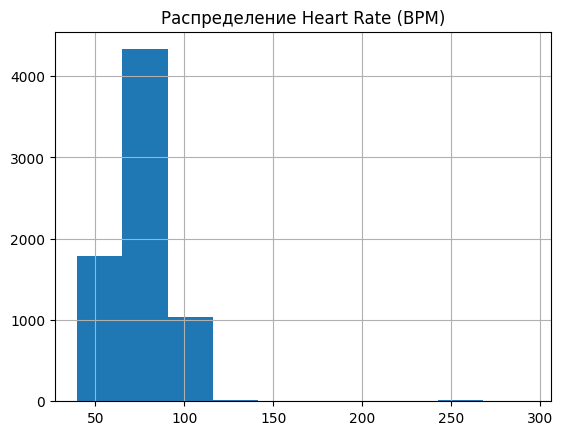

In [27]:
train['Heart Rate (BPM)'].hist()
plt.title('Распределение Heart Rate (BPM)')
plt.show()

### Просмотр базовой статистику по столбцу Heart Rate (BPM)

In [28]:
train['Heart Rate (BPM)'].describe()

count    7202.000000
mean       76.046746
std        18.485250
min        40.000000
25%        65.459926
50%        75.681688
75%        84.996836
max       293.221756
Name: Heart Rate (BPM), dtype: float64

### Группировка данных Heart Rate (BPM) в зависимости от Activity Level

In [29]:
train.groupby('Activity Level')['Heart Rate (BPM)'].agg(['count','mean','median'])

,count,mean,median
Activity Level,,,
Active,2411,76.385151,76.081186
Highly Active,2359,75.900382,75.247710
Sedentary,2432,75.853233,75.670431


<Axes: xlabel='Activity Level'>

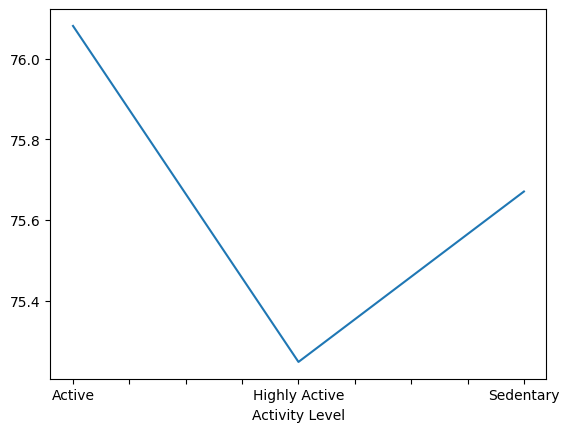

In [30]:
train.groupby('Activity Level')['Heart Rate (BPM)'].median().plot()

## Baseline

### Создаем новый столбец со средним значением Heart Rate (BPM)

In [31]:
train['Heart_Rate_pred_mean'] = train['Heart Rate (BPM)'].mean()
train

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,Heart_Rate_pred_mean
227,0.317829,80.501251,99.389649,21369.886288,4.967315,Sedentary,7,76.046746
4569,0.959240,40.121512,97.691890,19458.082930,8.704678,Sedentary,1,76.046746
3220,0.361852,55.353907,95.403392,4800.320140,6.305910,Highly Active,3,76.046746
4208,0.449914,77.789717,98.148575,23804.963811,5.095706,Active,10,76.046746
7950,0.345304,85.810494,97.657129,2004.285337,6.340568,Sedentary,3,76.046746
...,...,...,...,...,...,...,...,...
5979,0.130943,82.088183,95.133174,615.480197,8.585755,Active,5,76.046746
5407,0.322819,90.476950,95.358706,3862.395331,6.585822,Active,6,76.046746
5617,0.494898,77.666869,97.993051,1855.916665,8.960456,Highly Active,2,76.046746
901,0.758446,74.833544,96.625981,7067.003278,6.493064,Sedentary,6,76.046746


### Вычисляем ошибку предсказания между средним и фактическим

In [32]:
train['err'] = train['Heart_Rate_pred_mean'] - train['Heart Rate (BPM)']
train

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,Heart_Rate_pred_mean,err
227,0.317829,80.501251,99.389649,21369.886288,4.967315,Sedentary,7,76.046746,-4.454505
4569,0.959240,40.121512,97.691890,19458.082930,8.704678,Sedentary,1,76.046746,35.925234
3220,0.361852,55.353907,95.403392,4800.320140,6.305910,Highly Active,3,76.046746,20.692838
4208,0.449914,77.789717,98.148575,23804.963811,5.095706,Active,10,76.046746,-1.742971
7950,0.345304,85.810494,97.657129,2004.285337,6.340568,Sedentary,3,76.046746,-9.763748
...,...,...,...,...,...,...,...,...,...
5979,0.130943,82.088183,95.133174,615.480197,8.585755,Active,5,76.046746,-6.041437
5407,0.322819,90.476950,95.358706,3862.395331,6.585822,Active,6,76.046746,-14.430204
5617,0.494898,77.666869,97.993051,1855.916665,8.960456,Highly Active,2,76.046746,-1.620123
901,0.758446,74.833544,96.625981,7067.003278,6.493064,Sedentary,6,76.046746,1.213202


### Вычисляем абсолютную ошибку предсказания

In [33]:
train['err_abs'] = abs(train['err'])
train

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,Heart_Rate_pred_mean,err,err_abs
227,0.317829,80.501251,99.389649,21369.886288,4.967315,Sedentary,7,76.046746,-4.454505,4.454505
4569,0.959240,40.121512,97.691890,19458.082930,8.704678,Sedentary,1,76.046746,35.925234,35.925234
3220,0.361852,55.353907,95.403392,4800.320140,6.305910,Highly Active,3,76.046746,20.692838,20.692838
4208,0.449914,77.789717,98.148575,23804.963811,5.095706,Active,10,76.046746,-1.742971,1.742971
7950,0.345304,85.810494,97.657129,2004.285337,6.340568,Sedentary,3,76.046746,-9.763748,9.763748
...,...,...,...,...,...,...,...,...,...,...
5979,0.130943,82.088183,95.133174,615.480197,8.585755,Active,5,76.046746,-6.041437,6.041437
5407,0.322819,90.476950,95.358706,3862.395331,6.585822,Active,6,76.046746,-14.430204,14.430204
5617,0.494898,77.666869,97.993051,1855.916665,8.960456,Highly Active,2,76.046746,-1.620123,1.620123
901,0.758446,74.833544,96.625981,7067.003278,6.493064,Sedentary,6,76.046746,1.213202,1.213202


### Вычисление средней абсолютной ошибки

In [34]:
train['err_abs'].mean()

np.float64(12.176911085404672)

### Вычисление относительной ошибки предсказания

In [35]:
train['err_abs_pct'] = train['err_abs'] / train['Heart Rate (BPM)']
train

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,Heart_Rate_pred_mean,err,err_abs,err_abs_pct
227,0.317829,80.501251,99.389649,21369.886288,4.967315,Sedentary,7,76.046746,-4.454505,4.454505,0.055335
4569,0.959240,40.121512,97.691890,19458.082930,8.704678,Sedentary,1,76.046746,35.925234,35.925234,0.895411
3220,0.361852,55.353907,95.403392,4800.320140,6.305910,Highly Active,3,76.046746,20.692838,20.692838,0.373828
4208,0.449914,77.789717,98.148575,23804.963811,5.095706,Active,10,76.046746,-1.742971,1.742971,0.022406
7950,0.345304,85.810494,97.657129,2004.285337,6.340568,Sedentary,3,76.046746,-9.763748,9.763748,0.113783
...,...,...,...,...,...,...,...,...,...,...,...
5979,0.130943,82.088183,95.133174,615.480197,8.585755,Active,5,76.046746,-6.041437,6.041437,0.073597
5407,0.322819,90.476950,95.358706,3862.395331,6.585822,Active,6,76.046746,-14.430204,14.430204,0.159490
5617,0.494898,77.666869,97.993051,1855.916665,8.960456,Highly Active,2,76.046746,-1.620123,1.620123,0.020860
901,0.758446,74.833544,96.625981,7067.003278,6.493064,Sedentary,6,76.046746,1.213202,1.213202,0.016212


### Вычисление средней относительной ошибки предсказания

In [36]:
train['err_abs_pct'].mean()

np.float64(0.16905984339525623)

### Создаем новый столбец с медианным значением Heart Rate (BPM)

In [37]:
train['Heart_Rate_pred_median'] = train['Heart Rate (BPM)'].median()
train

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,Heart_Rate_pred_mean,err,err_abs,err_abs_pct,Heart_Rate_pred_median
227,0.317829,80.501251,99.389649,21369.886288,4.967315,Sedentary,7,76.046746,-4.454505,4.454505,0.055335,75.681688
4569,0.959240,40.121512,97.691890,19458.082930,8.704678,Sedentary,1,76.046746,35.925234,35.925234,0.895411,75.681688
3220,0.361852,55.353907,95.403392,4800.320140,6.305910,Highly Active,3,76.046746,20.692838,20.692838,0.373828,75.681688
4208,0.449914,77.789717,98.148575,23804.963811,5.095706,Active,10,76.046746,-1.742971,1.742971,0.022406,75.681688
7950,0.345304,85.810494,97.657129,2004.285337,6.340568,Sedentary,3,76.046746,-9.763748,9.763748,0.113783,75.681688
...,...,...,...,...,...,...,...,...,...,...,...,...
5979,0.130943,82.088183,95.133174,615.480197,8.585755,Active,5,76.046746,-6.041437,6.041437,0.073597,75.681688
5407,0.322819,90.476950,95.358706,3862.395331,6.585822,Active,6,76.046746,-14.430204,14.430204,0.159490,75.681688
5617,0.494898,77.666869,97.993051,1855.916665,8.960456,Highly Active,2,76.046746,-1.620123,1.620123,0.020860,75.681688
901,0.758446,74.833544,96.625981,7067.003278,6.493064,Sedentary,6,76.046746,1.213202,1.213202,0.016212,75.681688


### Вычисление средней абсолютной ошибки

In [38]:
mean_absolute_error(train['Heart Rate (BPM)'],train['Heart_Rate_pred_mean'])

12.176911085404672

In [40]:
mean_absolute_error(train['Heart Rate (BPM)'],train['Heart_Rate_pred_median'])

12.170031076560573

### Вычисление средней абсолютной процентной ошибки

In [39]:
mean_absolute_percentage_error(train['Heart Rate (BPM)'],train['Heart_Rate_pred_mean'])

0.16905984339525623

In [41]:
mean_absolute_percentage_error(train['Heart Rate (BPM)'],train['Heart_Rate_pred_median'])

0.168157928400758